# **Trabajo final - Unidad 1**

## EDA Inicial

In [ ]:
#Librerías: pandas para el EDA, numpy para operaciones numéricas.
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Produccion de petroleo.csv')

In [ ]:
df.head()

,anio,mes,indice_tiempo,provincia,produccion_petroleo_promedio_dia_m3
0,2009,1,2009-01,Chubut,25615.042484
1,2009,1,2009-01,Estado Nacional,684.083226
2,2009,1,2009-01,Formosa,416.606452
3,2009,1,2009-01,Jujuy,46.487742
4,2009,1,2009-01,La Pampa,3925.047097


Las columnas que tenemos son:

anio: Año de la medición.

mes: Mes correspondiente al registro.

indice_tiempo: Fecha en formato año-mes que sirve como índice temporal.

provincia: Provincia donde se midió la producción.

produccion_petroleo_promedio_dia_m3: Producción promedio diaria de petróleo durante ese mes, medida en metros cúbicos (m³).

In [ ]:
df.shape[0] #Filas del dataset

2476

In [ ]:
summary = pd.DataFrame({'Column': df.columns, 'Data Type': df.dtypes, 'Non-Null Count': df.notnull().sum(), 'Null Count': df.isnull().sum(), 'Null %': (df.isnull().mean() * 100).round(2)}).reset_index(drop=True)
summary

,Column,Data Type,Non-Null Count,Null Count,Null %
0,anio,int64,2476,0,0.0
1,mes,int64,2476,0,0.0
2,indice_tiempo,object,2476,0,0.0
3,provincia,object,2476,0,0.0
4,produccion_petroleo_promedio_dia_m3,float64,2476,0,0.0


El dataset contiene 2.476 registros y 5 variables, todas completamente completas y sin valores faltantes.

Las variables anio y mes están correctamente almacenadas como enteros.

La variable provincia está en formato object, que es adecuado para una variable categórica.


La producción aparece en float64, formato apropiado para valores numéricos continuos

Conclusión: El dataset está limpio, sin nulos y listo para el análisis; solo requiere convertir indice_tiempo a datetime en etapas posteriores.

# EDA Descriptivo

*Análisis univariado*

El objetivo es analizar cómo varía la producción de petróleo (m³/día) en distintas provincias argentinas, a lo largo de diferentes años y meses, detectando valores atípicos y explorando la distribución de los datos.

Para este análisis
usamos Matplotlib y Seaborn, que permiten visualizar fácilmente la distribución y ver qué provincias tienen más o menos datos.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Produccion de petroleo.csv')

### Variable 1: Provincia

Se explora la variable provincia ya que es la variable categórica más relevante, porque muestra cómo se distribuye espacialmente la actividad petrolera y complementa el análisis de producción

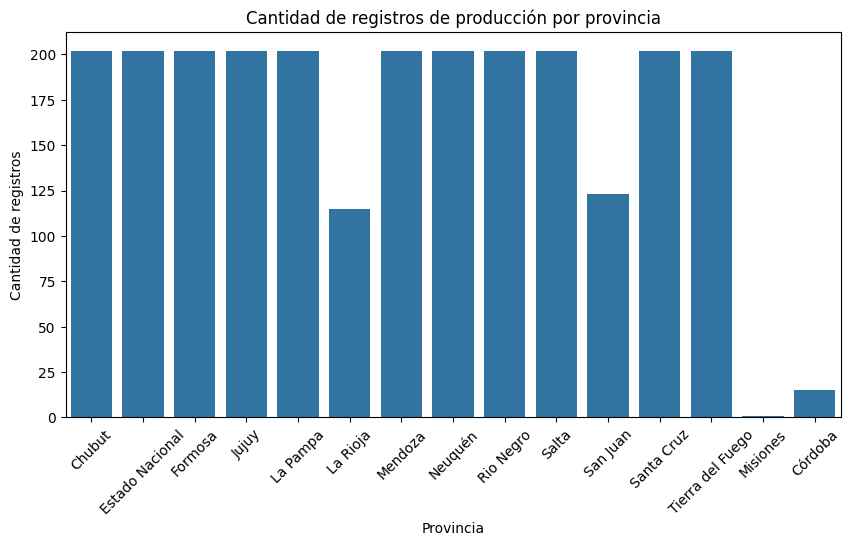

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()

ax = sns.countplot(x='provincia', data=df)

plt.xticks(rotation=45)
plt.title("Cantidad de registros de producción por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de registros")

plt.show()


La variable provincia muestra una distribución desigual de registros, indicando que algunas provincias aportan mucha más información que otras. Esta diferencia también sugiere que la actividad petrolera está concentrada en determinadas regiones.
El gráfico de barras permitió visualizar fácilmente qué provincias tienen mayor presencia en el dataset, lo que será importante al momento de interpretar la producción y realizar comparaciones posteriores.

In [33]:
# Cantidad de registros por provincia
counts = df['provincia'].value_counts()

# Cálculo de outliers con IQR
Q1 = counts.quantile(0.25)
Q3 = counts.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos provincias dentro del rango normal
provincias_validas = counts[(counts >= lower_bound) & (counts <= upper_bound)].index

df_sin_outliers = df[df['provincia'].isin(provincias_validas)]


### Variable 2: Producción

Se explora la variable numérica producción porque es la columna principal y la más importante del dataset.

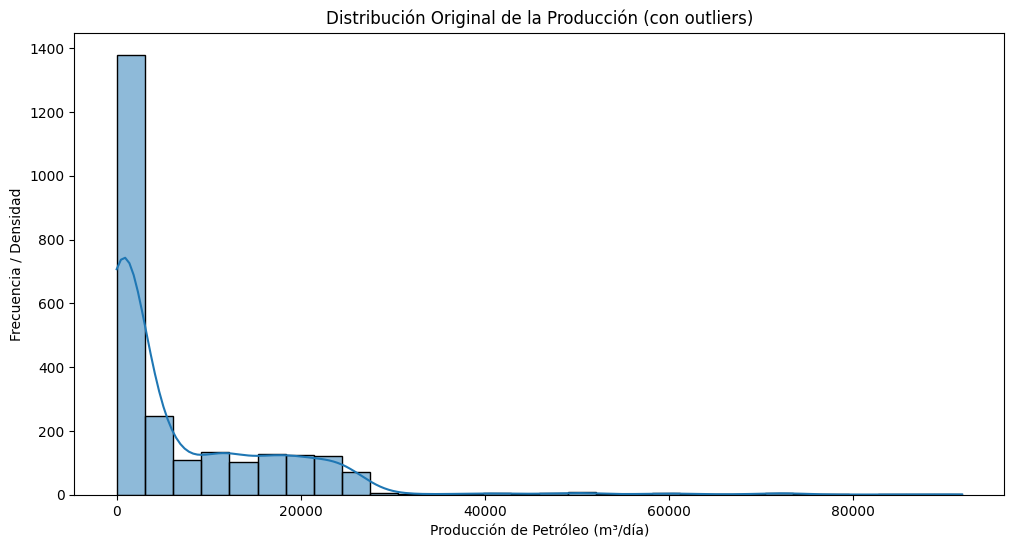

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(df['produccion_petroleo_promedio_dia_m3'], kde=True, bins=30)

plt.xlabel("Producción de Petróleo (m³/día)")
plt.ylabel("Frecuencia / Densidad")
plt.title("Distribución Original de la Producción (con outliers)")

plt.show()


In [ ]:
df['produccion_petroleo_promedio_dia_m3'].describe()


,produccion_petroleo_promedio_dia_m3
count,2476.000000
mean,7283.492689
std,10932.098561
min,0.000000
25%,360.929069
50%,1707.809125
75%,12109.473428
max,91854.151912


El valor máximo de producción es completamente desproporcionado en comparación con la media y los valores mínimos registrados. Esta diferencia tan marcada indica la presencia de pozos con rendimientos extremadamente altos y refuerza la necesidad de trabajar y analizar con mayor detalle los valores extremos



Ahora se calcula los cuartiles para entender la distribución de la variable y detectar posibles valores atípicos.

In [ ]:
# Cálculo de cuartiles e IQR
Q1 = df['produccion_petroleo_promedio_dia_m3'].quantile(0.25)
Q3 = df['produccion_petroleo_promedio_dia_m3'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df_filtrado = df[(df['produccion_petroleo_promedio_dia_m3'] >= limite_inferior) & (df['produccion_petroleo_promedio_dia_m3'] <= limite_superior)]

Los límites calculados nos permiten ver qué registros quedan fuera de lo esperado para la producción diaria de petróleo.
Los valores que superan el límite superior corresponden a meses con producción excepcionalmente alta, mientras que los valores por debajo del límite inferior representan registros atípicamente bajos.
Estos casos deben analizarse con más detalle, ya que pueden deberse a errores de registro, pozos extraordinarios o eventos operativos particulares

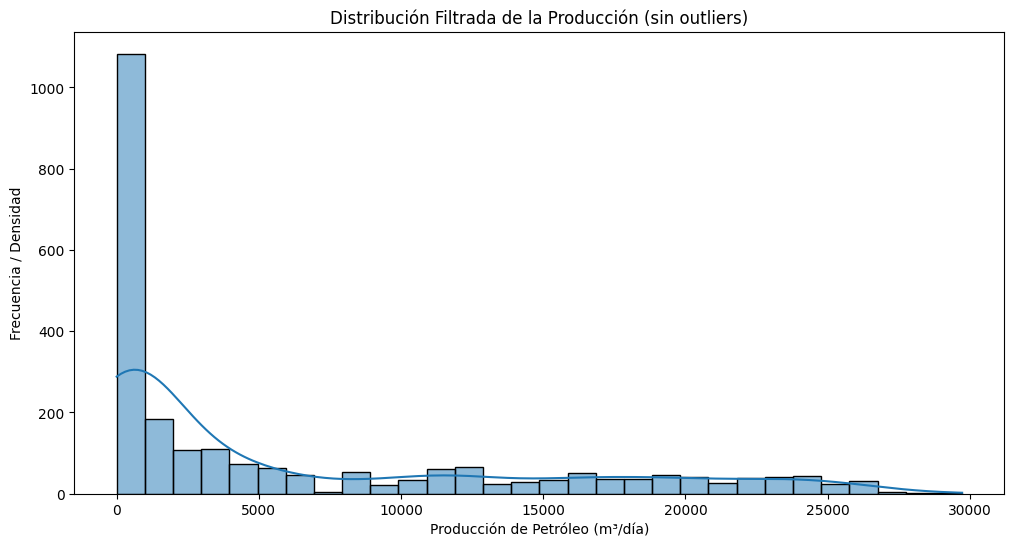

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(df_filtrado['produccion_petroleo_promedio_dia_m3'], kde=True, bins=30)

plt.xlabel("Producción de Petróleo (m³/día)")
plt.ylabel("Frecuencia / Densidad")
plt.title("Distribución Filtrada de la Producción (sin outliers)")

plt.show()


El primer gráfico se ve distorsionado debido a un valor extremadamente alto, que concentra el resto de las observaciones sobre el eje izquierdo. Al visualizar la distribución sin ese valor, el segundo gráfico muestra una forma mucho más clara y representativa.
De todos modos, el valor extremo se mantiene en el análisis porque corresponde a un caso real y aporta información útil

Realizamos el gráfico con la media, mediana y moda para visualizar cómo se distribuyen los valores de producción promedio diaria y comparar estas medidas de tendencia central dentro del comportamiento real de los datos.

In [ ]:
media = df_filtrado['produccion_petroleo_promedio_dia_m3'].mean()
mediana = df_filtrado['produccion_petroleo_promedio_dia_m3'].median()
moda = df_filtrado['produccion_petroleo_promedio_dia_m3'].mode()[0]

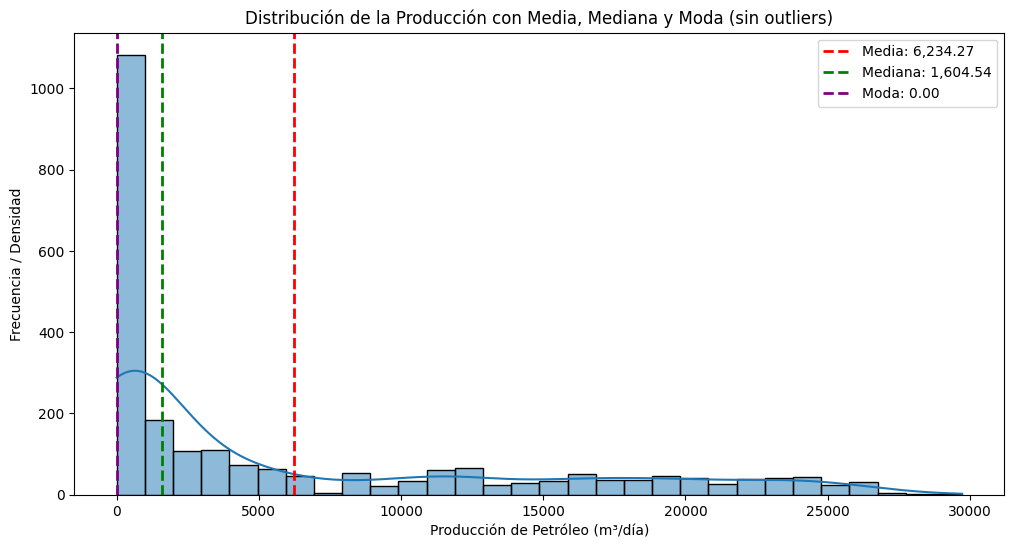

Media: 6,234.27
Mediana: 1,604.54
Moda: 0.00


In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df_filtrado, x='produccion_petroleo_promedio_dia_m3', kde=True, bins=30, ax=ax)

# Dibujar líneas de media, mediana y moda
ax.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:,.2f}')
ax.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:,.2f}')
ax.axvline(moda, color='purple', linestyle='dashed', linewidth=2, label=f'Moda: {moda:,.2f}')

# Etiquetas y título
ax.set_xlabel("Producción de Petróleo (m³/día)")
ax.set_ylabel("Frecuencia / Densidad")
ax.set_title("Distribución de la Producción con Media, Mediana y Moda (sin outliers)")

# Añadimos la leyenda para identificar las líneas.
ax.legend()
plt.show()

# Mostrarmos los valores
print(f"Media: {media:,.2f}")
print(f"Mediana: {mediana:,.2f}")
print(f"Moda: {moda:,.2f}")


La distribución de la producción presenta un marcado sesgo positivo: la mayoría de los registros se concentran en valores bajos, mientras que unos pocos valores muy elevados desplazan la media hacia la derecha, quedando claramente por encima de la mediana.

La moda es 0 porque constituye el valor con mayor frecuencia absoluta en el conjunto de datos, lo que refleja la elevada cantidad de observaciones con producción nula en determinados períodos o jurisdicciones

Ahora utilizamos un boxplot para visualizar la dispersión de la producción y detectar fácilmente la presencia de valores atípicos.

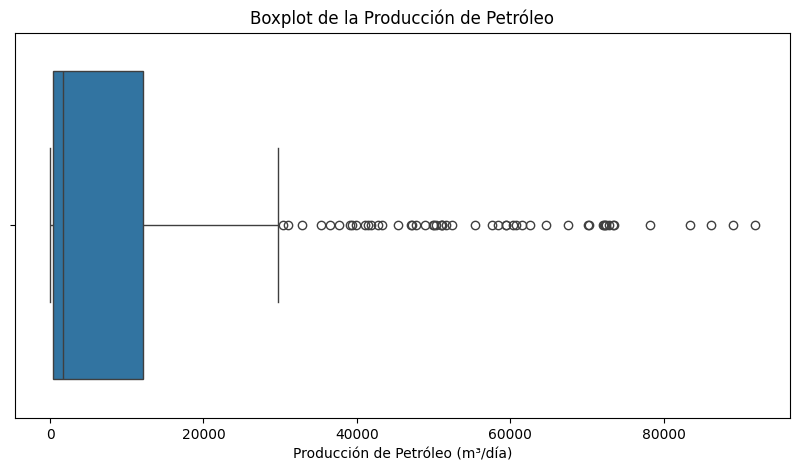

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['produccion_petroleo_promedio_dia_m3'])
plt.xlabel("Producción de Petróleo (m³/día)")
plt.title("Boxplot de la Producción de Petróleo")
plt.show()

El boxplot muestra que la mayor parte de la producción petrolera se concentra en un rango bien definido, mientras que un pequeño grupo de pozos presenta valores mucho más altos. Estos valores extremos, al estar tan alejados del resto, distorsionaban la escala del gráfico original y ocultaban la forma real de la distribución.

Luego del filtrado, la producción típica se visualiza claramente y los cuartiles se ajustan, aunque todavía aparecen algunos puntos atípicos debido a esa nueva recalibración. No es necesario eliminarlos: representan casos reales de producción elevada y permiten comprender mejor la variabilidad natural del sistema.

###Variable 3: Mes


Analizar la información por mes nos permite ver cambios estacionales y detectar si la variable sube, baja o se mantiene estable a lo largo del año. A continuación, vamos a revisar cómo evoluciona mes a mes para identificar patrones y tendencias claras.

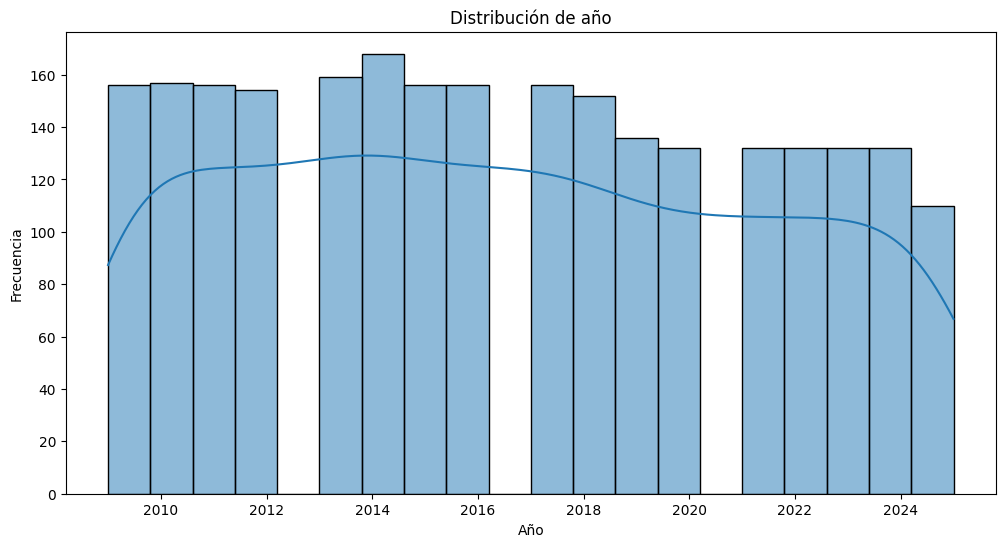

In [ ]:
plt.figure(figsize=(12,6))

sns.histplot(df['anio'], kde=True, bins=20)
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.title("Distribución de año")
plt.show()


In [ ]:
Q1 = df['anio'].quantile(0.25)
Q3 = df['anio'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_anio_filtrado = df[(df['anio'] >= lower) & (df['anio'] <= upper)]


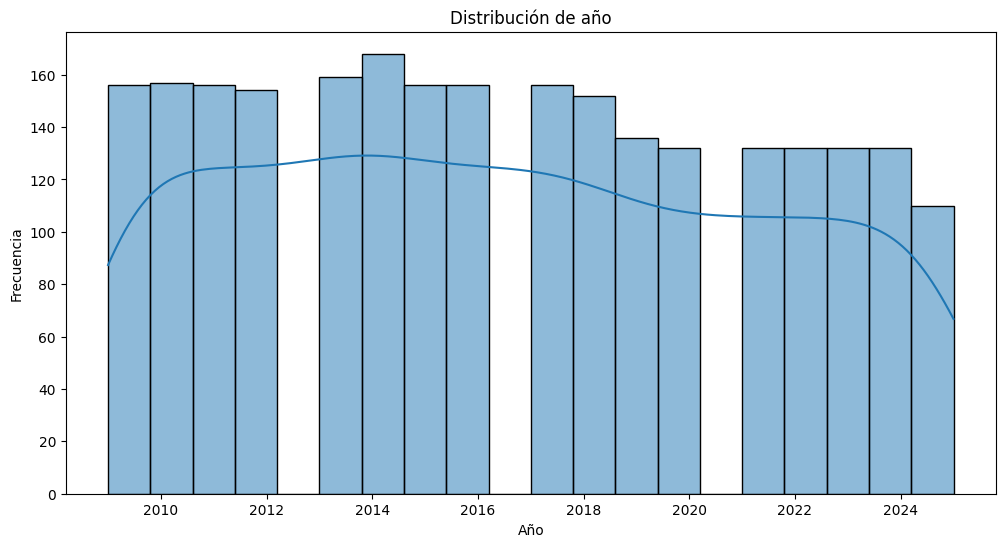

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df_anio_filtrado['anio'], kde=True, bins=20)

plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.title("Distribución de año")
plt.show()


La variable año no presenta outliers porque es un valor secuencial y limitado, sin variaciones bruscas. Por eso, al aplicar el método IQR, ningún dato queda fuera del rango esperado, y los gráficos antes y después del filtrado se ven exactamente iguales

# EDA Visualización

*Análisis multivariado*

###BOXPLOT

En este análisis se estudia la distribución de la producción promedio diaria de petróleo por provincia mediante gráficos de boxplot. Este tipo de visualización permite comparar de forma sencilla el nivel típico de producción entre provincias e identificar la presencia de valores atípicos.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Produccion de petroleo.csv')

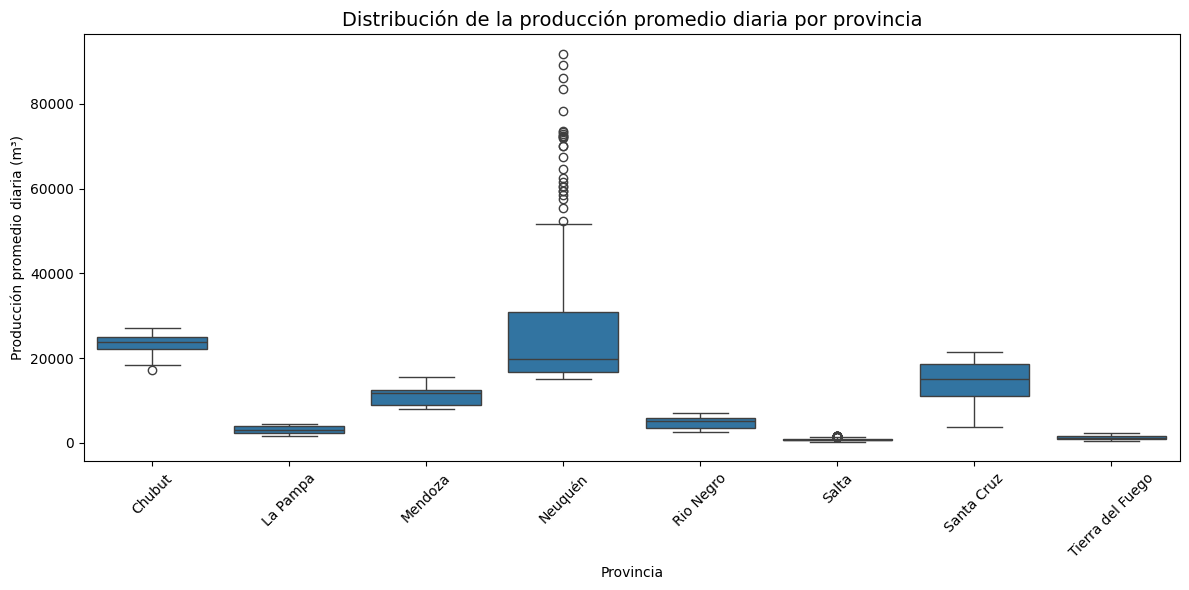

In [ ]:
# Me quedo con las provincias más relevantes (mayor producción total)
top_provs = (df.groupby('provincia')['produccion_petroleo_promedio_dia_m3'].sum().sort_values(ascending=False).head(8).index)
df_box = df[df['provincia'].isin(top_provs)].copy()

#Gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, x='provincia', y='produccion_petroleo_promedio_dia_m3')
plt.xticks(rotation=45)
plt.title('Distribución de la producción promedio diaria por provincia', fontsize=14)
plt.xlabel('Provincia')
plt.ylabel('Producción promedio diaria (m³)')
plt.tight_layout()
plt.show()


Filtramos los outliers

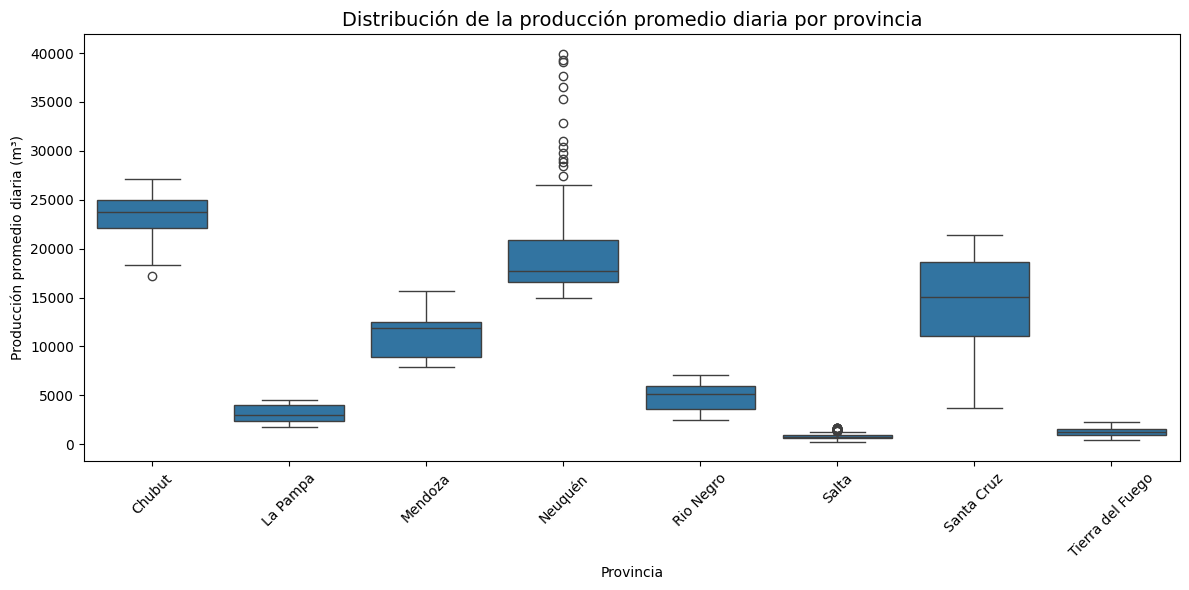

In [ ]:
top_provs = (df.groupby('provincia')['produccion_petroleo_promedio_dia_m3'].sum().sort_values(ascending=False).head(8).index)
df_box = df[df['provincia'].isin(top_provs)].copy()
var_prod = 'produccion_petroleo_promedio_dia_m3'

# Cálculo de límites de outliers (IQR) sobre estas provincias
q1 = df_box[var_prod].quantile(0.25)
q3 = df_box[var_prod].quantile(0.75)
iqr = q3 - q1
upper_lim = q3 + 1.5 * iqr
lower_lim = q1 - 1.5 * iqr

# Filtrar SIN outliers
df_box_sin_out = df_box[(df_box[var_prod] >= lower_lim) & (df_box[var_prod] <= upper_lim)].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box_sin_out, x='provincia', y='produccion_petroleo_promedio_dia_m3')
plt.xticks(rotation=45)
plt.title('Distribución de la producción promedio diaria por provincia', fontsize=14)
plt.xlabel('Provincia')
plt.ylabel('Producción promedio diaria (m³)')
plt.tight_layout()
plt.show()


El boxplot muestra que la producción de petróleo se concentra principalmente en Chubut, Neuquén y Santa Cruz, con niveles promedio muy superiores al resto de las provincias. Neuquén presenta, además, numerosos valores atípicos hacia arriba, pueden deberse a su rol como principal área productora (especialmente por Vaca Muerta), donde la entrada en operación de nuevos pozos o proyectos y las variaciones operativas generan picos de producción mensuales mucho mayores que en el resto de las provincias

### HEATMAP: Relaciones entre muchas variables


El heatmap se emplea para representar de forma compacta la matriz de correlación entre múltiples variables numéricas, permitiendo detectar de inmediato asociaciones fuertes y patrones relevantes sin recurrir a numerosos gráficos individuales

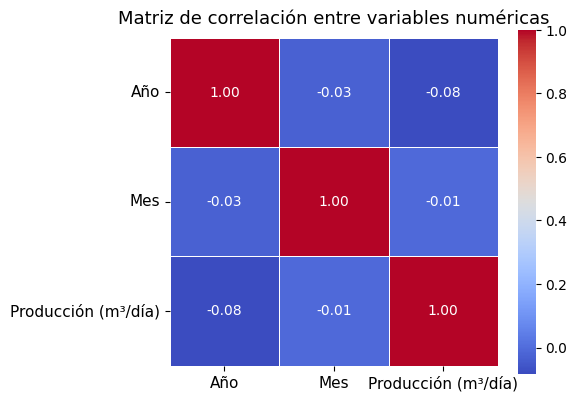

In [ ]:
var_prod = 'produccion_petroleo_promedio_dia_m3'

#Outliers
q1 = df[var_prod].quantile(0.25)
q3 = df[var_prod].quantile(0.75)
iqr = q3 - q1
upper_lim = q3 + 1.5 * iqr
lower_lim = q1 - 1.5 * iqr
df_no_out = df[(df[var_prod] >= lower_lim) & (df[var_prod] <= upper_lim)].copy()

# Solo dejo columnas relevantes
num_df = df_no_out[['anio', 'mes', 'produccion_petroleo_promedio_dia_m3']].copy()

# Renombro
num_df = num_df.rename(columns={'anio': 'Año','mes': 'Mes','produccion_petroleo_promedio_dia_m3': 'Producción (m³/día)'})

# Matriz de correlación
corr = num_df.corr(numeric_only=True)

# Gráfico
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.title('Matriz de correlación entre variables numéricas', fontsize=13, pad=10)
plt.tight_layout()
plt.show()


Podemos ver que la producción no está relacionada con el tiempo: no hay años ni meses que produzcan sistemáticamente más o menos petróleo, por lo que las variaciones se deben a otros factores y no al calendario.

##Feature Engineering

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Produccion de petroleo.csv')

En este trabajo se optó por aplicar capping sobre la producción (recortando los valores por debajo del percentil 1 y por encima del percentil 99), ya que permite reducir el impacto de los valores extremos manteniendo la variable en su escala original (m³/día), lo que facilita la interpretación de los gráficos y las conclusiones, a diferencia de una transformación logarítmica que complicaría la lectura sin aportar beneficios relevantes para este análisis descriptivo.

Capping

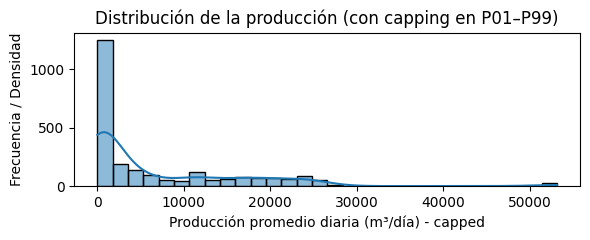

In [ ]:
# Calculamos percentiles extremos inferior y superior (1% y 99%)
p01_prod = df['produccion_petroleo_promedio_dia_m3'].quantile(0.01)
p99_prod = df['produccion_petroleo_promedio_dia_m3'].quantile(0.99)

# Aplicamos capping sobre la producción
df['produccion_capped'] = df['produccion_petroleo_promedio_dia_m3'].clip(lower=p01_prod, upper=p99_prod)

# Histograma de la variable recortada
plt.figure(figsize=(6, 2.5))
sns.histplot(data=df, x='produccion_capped', kde=True, bins=30)
plt.xlabel("Producción promedio diaria (m³/día) - capped")
plt.ylabel("Frecuencia / Densidad")
plt.title("Distribución de la producción (con capping en P01–P99)")
plt.tight_layout()
plt.show()


Tras aplicar el capping, la distribución se vuelve mucho más compacta: la parte central casi no cambia y las observaciones extremas quedan concentradas en el último bin, reduciendo el efecto de los valores atípicos sin modificar la estructura general del resto de los datos.

###Binning

Para facilitar el análisis de la distribución de la variable, aplicamos binning: transformamos el valor continuo en categorías. Primero agrupamos usando rangos fijos (pd.cut) y luego por cuartiles (pd.qcut), lo que permite comparar tanto los niveles absolutos como la posición relativa de cada observación dentro del conjunto de datos.

Distribución por rangos (pd.cut):
prod_category_cut
R1    197300
R2     45200
R3      1400
R4      1900
R5      1300
R6       400
Name: count, dtype: int64

Nueva feature creada: 'prod_category_qcut'
prod_category_qcut
Q1_Prod    61900
Q2_Prod    61900
Q3_Prod    61900
Q4_Prod    61900
Name: count, dtype: int64


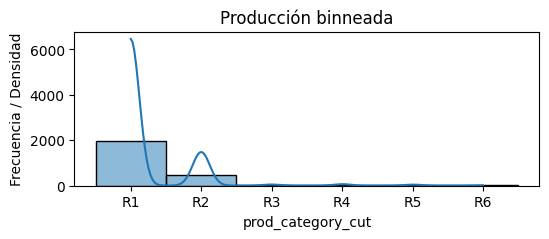

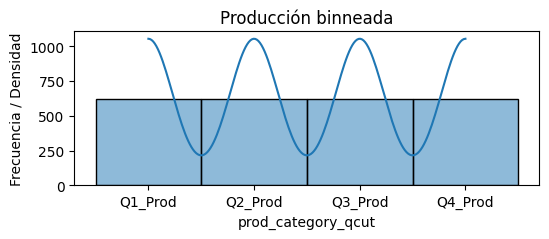

In [ ]:
# Armo 6 rangos iguales entre el mínimo y el máximo
prod_bins = np.linspace(df[var_prod].min(), df[var_prod].max(), 7)
prod_labels = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6']
df['prod_category_cut'] = pd.cut(df[var_prod], bins=prod_bins, labels=prod_labels, include_lowest=True, right=False)
print("Distribución por rangos (pd.cut):")
print(df['prod_category_cut'].value_counts().sort_index() * 100)

# Binning con pd.qcut() (cuantiles)
df['prod_category_qcut'] = pd.qcut(df[var_prod], q=4, labels=['Q1_Prod', 'Q2_Prod', 'Q3_Prod', 'Q4_Prod'], duplicates='drop')
print("\nNueva feature creada: 'prod_category_qcut'")
print(df['prod_category_qcut'].value_counts().sort_index() * 100)

# Gráfico 1
plt.figure(figsize=(6, 2))
sns.histplot(data=df, x='prod_category_cut', kde=True, bins=30)
plt.xlabel("prod_category_cut")
plt.ylabel("Frecuencia / Densidad")
plt.title("Producción binneada")
plt.show()
# Gráfico 2
plt.figure(figsize=(6, 2))
sns.histplot(data=df, x='prod_category_qcut', kde=True, bins=30)
plt.xlabel("prod_category_qcut")
plt.ylabel("Frecuencia / Densidad")
plt.title("Producción binneada")
plt.show()


Con el binning por rangos fijos se ve que la enorme mayoría de las observaciones cae en los primeros niveles (R1–R2), mientras que los rangos altos casi no tienen datos, lo que evidencia una distribución muy concentrada en producciones bajas. En cambio, con el binning por cuartiles los cuatro grupos quedan casi idénticos en cantidad de registros (cada uno ≈25 %), por definición de cuartil; por eso el gráfico se ve tan parejo. Así, el primer enfoque muestra dónde se concentran realmente los valores, y el segundo permite comparar grupos equilibrados en tamaño dentro de la distribución.